# Регрессия - пора творить!

Если вы дошли до этой практики и выполнили все предыдущие - вау! Аплодисменты вам!

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/leo.png" width=500/></p>



Тем не менее, не время расслабляться! На этот раз мы не будем рассказывать вам новый материал - лишь дадим пару напутствий и пожелаем успехов и сил!

В этот раз вам предлагается разработать модель предсказания цены домов по набору данных Boston Houses Pricing. Мы его уже немного пощупали в прошлой практике, но в этой вам предстоит сделать всё самостоятельно и на полных данных!

Что надо будет сделать:
- загрузить данные;
- посмотреть и размер, и примеры данных;
- проверить количество пропусков в данных;
    - убедиться, что пропусков в данных нет и можно строить **baseline**;
- разделить данные на train и test;
    - Делаем это один раз! Все дальнейшие модификации и улучшения должны делаться на основе единственного разделения!
    - И не забудьте зафиксировать сид! Переменную `RANDOM_SEED` мы даём ниже;
- создать baseline модель, получить метрики на тестовой выборке;
- проанализировать данные, подготовить план по очистке и предобработке данных;
- создать функцию очистки;
- произвести очистку train и test выборок -> обучаем модель с очищенными данными;
    - Снимаем метрики и так мы оцениваем влияние очистки данных на обучение;
- создать класс предобработки данных;
- сделать предобработку очищенных данных -> обучаем модель;
    - Снимаем метрики и так мы оцениваем влияние предобработки данных на обучение;

А дальше можете пофантазировать, почитать интернет и посмотреть, как улучшить метрики! 

**Ваша цель - достигнуть наилучших показателей!**

Вот вам пара идей по интересной организации предобработке:
- по признаку `CRIM` создать признак `is_CRIM`, который будет равен 1, если `CRIM` не равен 0 и 0, если `CRIM` равен нулю;
- сделать обучение модели [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html), посмотреть, какие признаки имеют веса близкие к 0 и убрать их из обучения как незначимые;
- оставить только признаки с высокой корреляцией с целевой переменной;
- посмотреть, какие переменные коррелирцют между собой и оставить только единственные из пар коррелирующих;
- посмотреть, в каких примерах данных модель ошибается сильнее всего (отсортировать записи из теста по величине ошибки) и проанализировать, есть ли какая-то зависимость или шум;
- комбинировать разные подходы в зависимости от того, помогает это предсказаниям или нет.

Ещё большим плюсом будет, если вы покажете, как влияет каждый этап предобработки на результаты обучения!

Что мы ждем от вас? 

Готовый ноутбук с таким же названием, в котором будут обязательные пункты с выводами по анализу данных и анализу поведения модели, а также дополнительные пункты с вашими мыслями и результатами улучшения модели.

Успехов вам, мы в вас верим, вы точно справитесь!

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/cat-computer-peek-out-36960208.jpg" width=600/></p>

Импортируем необходимые библиотеки:

In [1]:
%pip install numpy==1.26.4 pandas==2.2.2 matplotlib==3.8.4 scikit-learn==1.4.2 seaborn==0.13.2

import numpy as np
import matplotlib as mpl
import sklearn as skl
import seaborn as sns

# Проверка правильности установленных версий
print(np.__version__)
print(mpl.__version__)
print(skl.__version__)
print(sns.__version__)


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


1.26.4
3.8.4
1.4.2
0.13.2


Настройка визуализации и фиксирование RANDOM_SEED:

In [2]:
# Зафиксируем состояние случайных чисел
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Настройки для визуализации
TEXT_COLOR = "black"

plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["text.color"] = TEXT_COLOR
plt.rcParams["font.size"] = 14
plt.rcParams["lines.markersize"] = 15
plt.rcParams["axes.labelcolor"] = TEXT_COLOR
plt.rcParams["xtick.color"] = TEXT_COLOR
plt.rcParams["ytick.color"] = TEXT_COLOR

sns.set_style("darkgrid")


RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

Загрузим данные:

In [3]:
df_src = pd.read_csv("boston.csv")

Посмотрим размер данных:

In [4]:
df_src.shape

(506, 14)

Взглянем на сами данные (первые 10 строк):

In [5]:
df_src.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


Выведем информацию по датасету:

In [6]:
df_src.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Проверим количество пропусков в данных:

In [7]:
df_src.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Как можно убедиться, пропуски отсутствуют

Вторым этапом, раазделим данные на train и test:

In [8]:
from sklearn.model_selection import train_test_split
df_train_data, df_test_data = train_test_split(df_src, test_size=.3, random_state=RANDOM_SEED, shuffle=True)

df_train_data.shape, df_test_data.shape

((354, 14), (152, 14))

У нас: 354 данных для train, и 152 для test (пропорция 70/30)

Создадим baseline модель и снимем метрики:

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


def compute_MSE(y_true, y_pred):
    mse = np.mean((y_pred - y_true)**2)
    return mse


reg_model = LinearRegression()
df_train = df_train_data.copy()
y_true = df_train.pop('MEDV')

reg_model.fit(df_train, y_true)

df_test = df_test_data.copy()
y_test = df_test.pop('MEDV')

y_pred = reg_model.predict(df_test)

mse = compute_MSE(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)


MSE: 21.51744423117709
RMSE: 4.638689926172808
MAE: 3.1627098714573947
R2: 0.7112260057484948


Как можно заметить, метрики MSE, RMSE и MAE имеют достаточно большие значения. Попробуем это исправить!

Начнем анализировать данные и подготовим план по очистке.

Для анализа, создадим матрицу корреляций:

In [10]:
correlation_mtrx = df_src.corr()
correlation_mtrx

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Построим график матрицы корреляции:

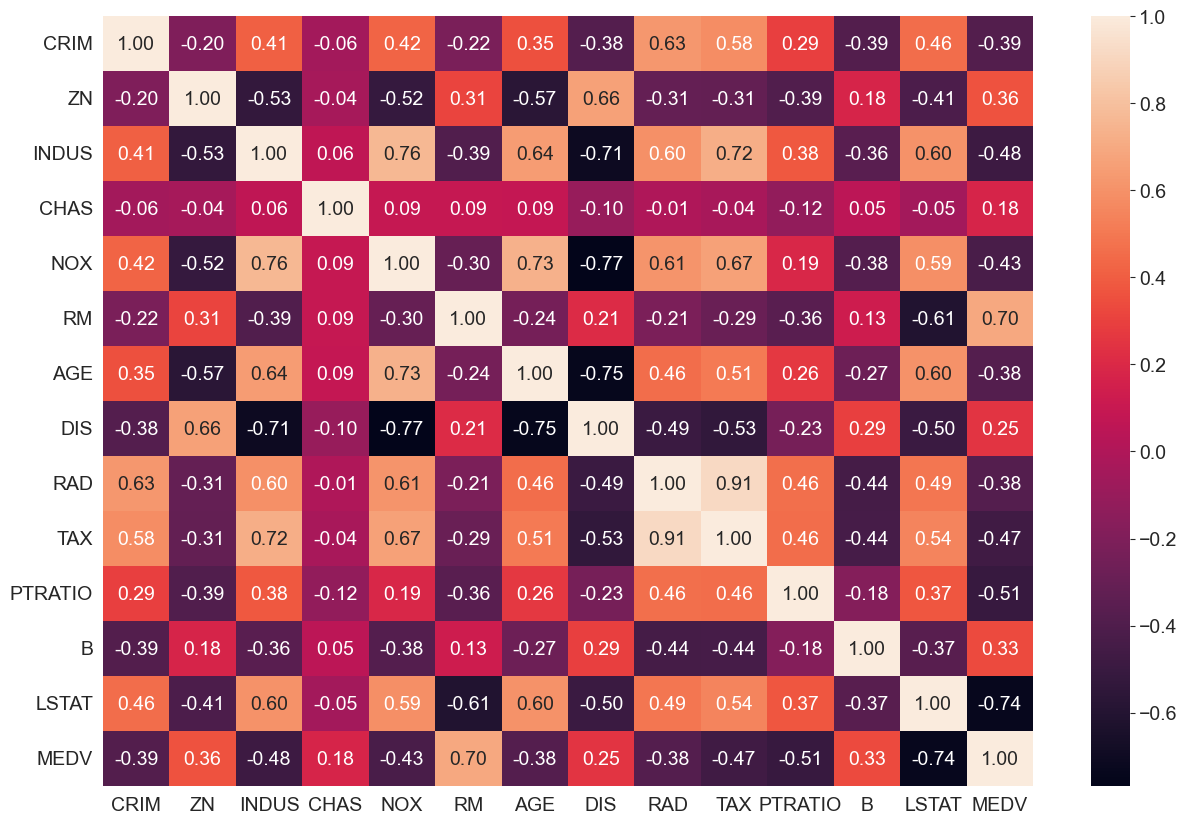

In [11]:
sns.heatmap(correlation_mtrx, annot=True, fmt=".2f")
plt.show()

Построим графики, чтобы визуально оценить, какие данные можно очистить:

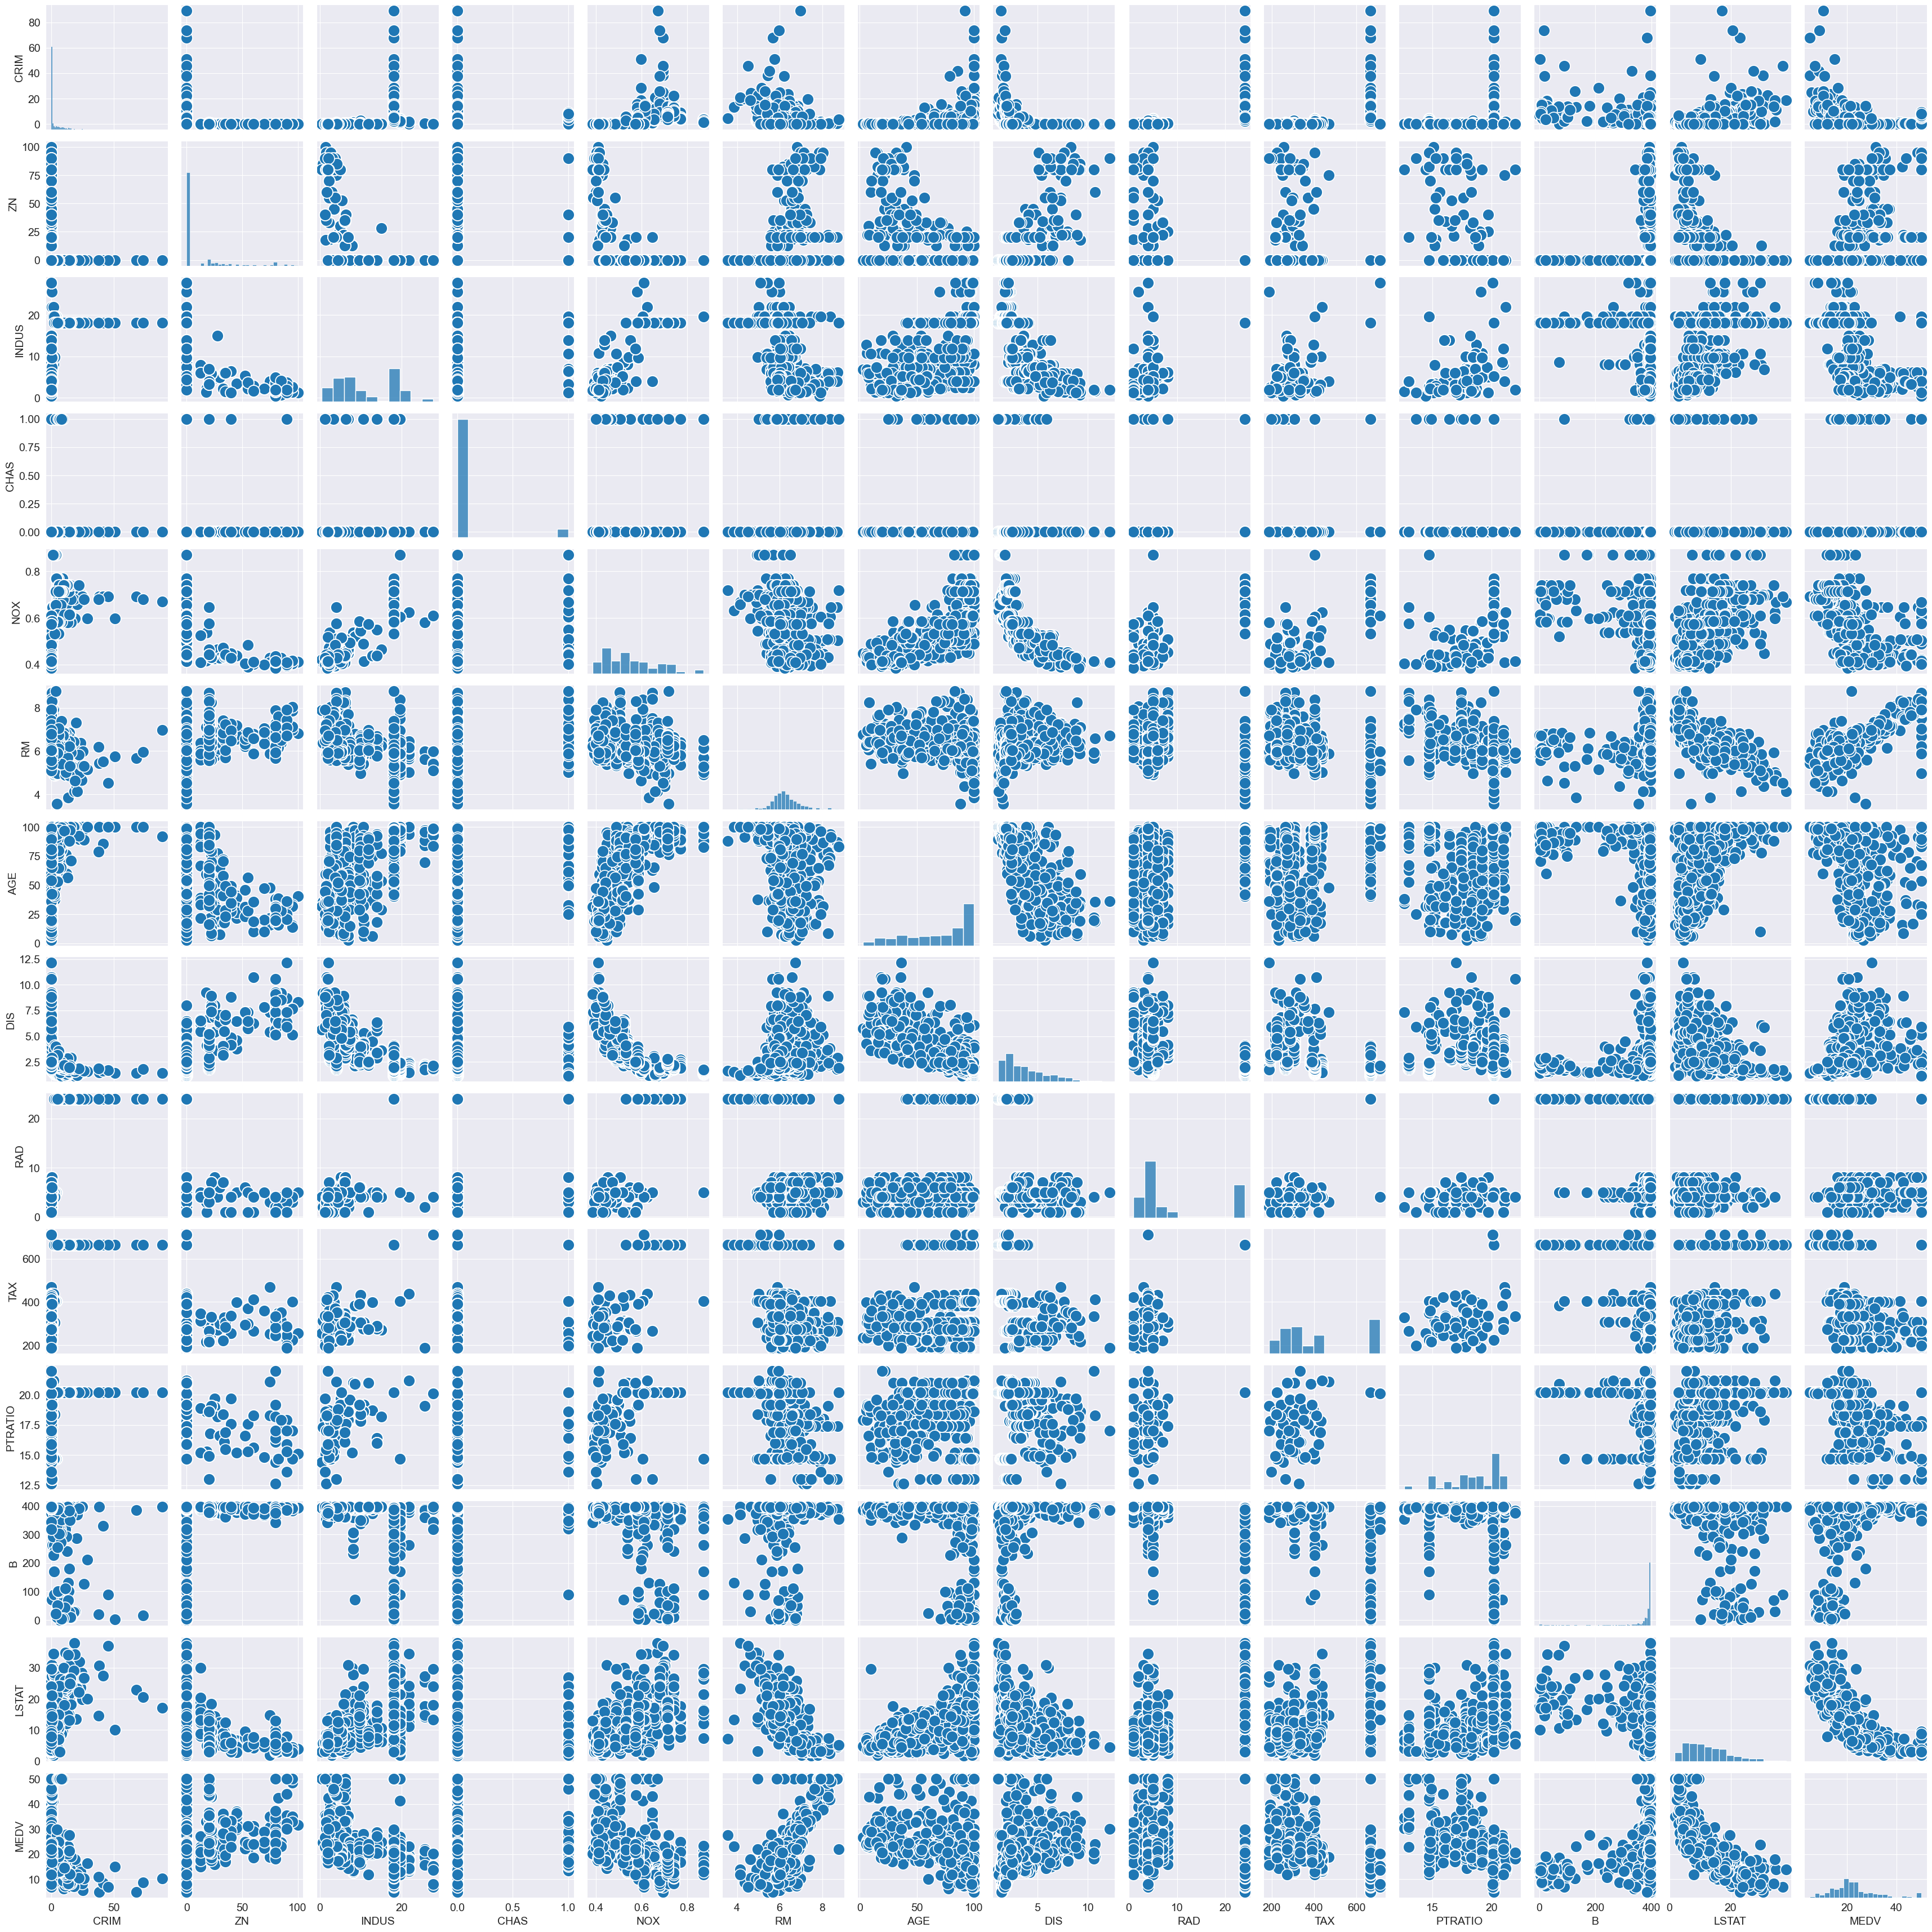

In [12]:
features = []

for column in df_src.columns:
    if column != 'MEDV':
        features.append(column)
features.append('MEDV')

sns.pairplot(df_src[features], diag_kind="auto", height=2.5)
plt.show()



Создадим функцию очистки. В качестве очистки, возьмем некоторые данные из прошлого ноутбука. Плюс ко всему, удалим из данных B и CHAS, поскольку у них малые значения корреляции:

In [13]:
def clean_dataset(df):
    outliers_mask_1 = df["MEDV"] == 50
    outliers_mask_2 = df["RM"] < 4
    outliers_mask_3 = (df["RM"] > 8) & (df["MEDV"] > 30)
    outliers_mask_4 = (df["LSTAT"] < 3) 
    outliers_mask_5 = (df["LSTAT"] > 20) & (df["RM"] < 5.5)
    outliers_mask_6 = (df["LSTAT"] >= 25) & (df["MEDV"] >= 40)
    outliers_mask_7 = df["CRIM"] >= 40
    outliers_mask_8 = df["TAX"] >= 500
    outliers_mask_9 = df["RAD"] >= 20

    outliers_mask = outliers_mask_1 | outliers_mask_2 | outliers_mask_3 |  outliers_mask_4 | outliers_mask_5 | outliers_mask_6 | outliers_mask_7 | outliers_mask_8 | outliers_mask_9

    df_cleaned = df.loc[~outliers_mask].copy() # copy() позволяет убрать warnings в терминале

    columns_to_drop = ["CHAS", "B"]
    df_cleaned.drop(columns=columns_to_drop, inplace=True)
    return df_cleaned
    

Проверим-с. 
Запустим очистку train и test выборок:

In [14]:
df_train_clean = clean_dataset(df_train_data)
df_test_clean = clean_dataset(df_test_data)

print(df_train_clean.head(3))
print("-------------------------------")
print(df_test_clean.head(3))


        CRIM   ZN  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
5    0.02985  0.0   2.18  0.458  6.430  58.7  6.0622    3  222.0     18.7   
116  0.13158  0.0  10.01  0.547  6.176  72.5  2.7301    6  432.0     17.8   
45   0.17142  0.0   6.91  0.448  5.682  33.8  5.1004    3  233.0     17.9   

     LSTAT  MEDV  
5     5.21  28.7  
116  12.04  21.2  
45   10.21  19.3  
-------------------------------
        CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
173  0.09178   0.0   4.05  0.510  6.416  84.1  2.6463    5  296.0     16.6   
274  0.05644  40.0   6.41  0.447  6.758  32.9  4.0776    4  254.0     17.6   
72   0.09164   0.0  10.81  0.413  6.065   7.8  5.2873    4  305.0     19.2   

     LSTAT  MEDV  
173   9.04  23.6  
274   3.53  32.4  
72    5.52  22.8  


Теперь, обучим модель на очищенных данных. Сравним метрики с неочищенными данными:

In [15]:
reg_model_clean = LinearRegression()

df_train_clean = df_train_clean.copy()
df_test_clean = df_test_clean.copy()

y_true_clean = df_train_clean.pop('MEDV')
y_test_clean = df_test_clean.pop('MEDV')

df_train_clean['MEDV'] = y_true_clean
df_test_clean['MEDV'] = y_test_clean

reg_model_clean.fit(df_train_clean.drop(columns=['MEDV']), y_true_clean)
y_pred_clean = reg_model_clean.predict(df_test_clean.drop(columns=['MEDV']))

mse_clean = compute_MSE(y_test_clean, y_pred_clean)
rmse_clean = np.sqrt(mse_clean)
mae_clean = mean_absolute_error(y_test_clean, y_pred_clean)
r2_clean = r2_score(y_test_clean, y_pred_clean)

# До очистки
print("MSE(до очистки):", mse)
print("RMSE(до очистки):", rmse)
print("MAE(до очистки):", mae)
print("R2(до очистки):", r2)

print("--------------------------------")

# После очистки
print("MSE(после очистки):", mse_clean)
print("RMSE(после очистки):", rmse_clean)
print("MAE(после очистки):", mae_clean)
print("R2(после очистки):", r2_clean)


MSE(до очистки): 21.51744423117709
RMSE(до очистки): 4.638689926172808
MAE(до очистки): 3.1627098714573947
R2(до очистки): 0.7112260057484948
--------------------------------
MSE(после очистки): 7.004357458231071
RMSE(после очистки): 2.6465746651532562
MAE(после очистки): 1.9642692531166033
R2(после очистки): 0.8474176469613384


Как можно заметить, после очистки данных, метрики стали лучше, особенно MSE.

Создадим класс предобработки данных. В классе сделаем предобработку очищенных данных. Плюс ко всему, добавим метод MinMaxScaler() чтобы посмотреть, станут ли метрики лучше:

In [16]:
from sklearn.preprocessing import MinMaxScaler


class DataPreprocessing:
    def __init__(self, add_is_crim=True):
        self.add_is_crim = add_is_crim  
        self.selected_features = []
        self.scaler = MinMaxScaler()


    def clean_dataset(self, df):
        outliers_mask_1 = df["MEDV"] == 50
        outliers_mask_2 = df["RM"] < 4
        outliers_mask_3 = (df["RM"] > 8) & (df["MEDV"] > 30)
        outliers_mask_4 = (df["LSTAT"] < 3) 
        outliers_mask_5 = (df["LSTAT"] > 20) & (df["RM"] < 5.5)
        outliers_mask_6 = (df["LSTAT"] >= 25) & (df["MEDV"] >= 40)
        outliers_mask_7 = df["CRIM"] >= 40
        outliers_mask_8 = df["TAX"] >= 500
        outliers_mask_9 = df["RAD"] >= 20

        outliers_mask = outliers_mask_1 | outliers_mask_2 | outliers_mask_3 |  outliers_mask_4 | outliers_mask_5 | outliers_mask_6 | outliers_mask_7 | outliers_mask_8 | outliers_mask_9

        
        df_cleaned = df.loc[~outliers_mask].copy() # copy() позволяет убрать warnings в терминале

        columns_to_drop = ["CHAS", "B"]
        df_cleaned.drop(columns=columns_to_drop, inplace=True)
        return df_cleaned


    def fit(self, df, threshold):
        df_cleaned = self.clean_dataset(df)
        
        if self.add_is_crim and 'CRIM' in df_cleaned.columns:
            df_cleaned['is_CRIM'] = (df_cleaned['CRIM'] > 0).astype(int)
        
        corr_matrix_threshold = df_cleaned.corr().abs()
        self.selected_features = corr_matrix_threshold[corr_matrix_threshold > threshold].index.tolist()

        if "MEDV" in self.selected_features:
            self.selected_features.remove("MEDV")
            
        self.scaler.fit(df_cleaned[self.selected_features])


    def transform(self, df):
        df_cleaned = self.clean_dataset(df)
        
        if self.add_is_crim and 'CRIM' in df_cleaned.columns:
            df_cleaned['is_CRIM'] = (df_cleaned['CRIM'] > 0).astype(int)

        df_transformed = df_cleaned.copy()
        df_transformed[self.selected_features] = self.scaler.transform(df_transformed[self.selected_features]) 
        return df_transformed


Обучим модель и снимем метрики. Сравним результаты:

In [17]:
preprocessor = DataPreprocessing(add_is_crim=True)
preprocessor.fit(df_train_data, threshold=0.5)  

df_train_clean = preprocessor.transform(df_train_data) 
df_test_clean = preprocessor.transform(df_test_data)


y_train = df_train_clean.pop('MEDV')
X_train = df_train_clean
y_test = df_test_clean.pop('MEDV')
X_test = df_test_clean


reg_model_clean = LinearRegression()
reg_model_clean.fit(X_train, y_train)
y_pred_clean = reg_model_clean.predict(X_test)


mse_clean_preprocess = compute_MSE(y_test, y_pred_clean)
rmse_clean_preprocess = np.sqrt(mse_clean_preprocess)
mae_clean_preprocess = mean_absolute_error(y_test, y_pred_clean)
r2_clean_preprocess = r2_score(y_test, y_pred_clean)

print("MSE(до очистки):", mse)
print("RMSE(до очистки):", rmse)
print("MAE(до очистки):", mae)
print("R2(до очистки):", r2)

print("--------------------------------")

print("MSE(после предобработки):", mse_clean_preprocess)
print("RMSE(после предобработки):", rmse_clean_preprocess)
print("MAE(после предобработки):", mae_clean_preprocess)
print("R2(после предобработки):", r2_clean_preprocess)


MSE(до очистки): 21.51744423117709
RMSE(до очистки): 4.638689926172808
MAE(до очистки): 3.1627098714573947
R2(до очистки): 0.7112260057484948
--------------------------------
MSE(после предобработки): 7.004357458231085
RMSE(после предобработки): 2.646574665153259
MAE(после предобработки): 1.9642692531166066
R2(после предобработки): 0.8474176469613381


Мысли 🤔💭

В ходе выполнения данной работы, можно сделать вывод о том, что анализ данных и его очистка - важна. Визуализируя данные графиками и матрицей корреляций можно увидеть, какие данные нам не нужны (слабо коррелируют) и можно их удалить, а какие - сильно зависят. Графики позволяют увидеть выбросы и очистить их, что в результате - улучшает качество модели.